In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Mental Health Dataset.csv')


print(df.head())
print(df.info())
print(df.describe())

         Timestamp  Gender        Country Occupation self_employed  \
0  8/27/2014 11:29  Female  United States  Corporate           NaN   
1  8/27/2014 11:31  Female  United States  Corporate           NaN   
2  8/27/2014 11:32  Female  United States  Corporate           NaN   
3  8/27/2014 11:37  Female  United States  Corporate            No   
4  8/27/2014 11:43  Female  United States  Corporate            No   

  family_history treatment Days_Indoors Growing_Stress Changes_Habits  \
0             No       Yes    1-14 days            Yes             No   
1            Yes       Yes    1-14 days            Yes             No   
2            Yes       Yes    1-14 days            Yes             No   
3            Yes       Yes    1-14 days            Yes             No   
4            Yes       Yes    1-14 days            Yes             No   

  Mental_Health_History Mood_Swings Coping_Struggles Work_Interest  \
0                   Yes      Medium               No            No   


In [3]:
# Data Cleaning
# Check for missing values
print(df.isnull().sum())

# Handle missing values - fill empty self_employed with 'No'
df['self_employed'].fillna('No', inplace=True)

# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Standardize categorical values
df['Gender'] = df['Gender'].str.title()
df['Country'] = df['Country'].str.title()
df['Occupation'] = df['Occupation'].str.title()

# Convert 'Days_Indoors' to ordered categorical
df['Days_Indoors'] = pd.Categorical(df['Days_Indoors'], 
                                   categories=['Go out Every day', '1-14 days', '15-30 days', 'More than 2 months'],
                                   ordered=True)

# Clean 'care_options' column
df['care_options'] = df['care_options'].replace({'Not sure': 'Unsure'})

# Convert boolean-like columns to consistent format
yes_no_cols = ['self_employed', 'family_history', 'treatment', 'Growing_Stress', 
               'Changes_Habits', 'Mental_Health_History', 'Coping_Struggles', 
               'Work_Interest', 'Social_Weakness']
for col in yes_no_cols:
    df[col] = df[col].replace({'Yes': 'Yes', 'No': 'No', 'Maybe': 'Maybe'}).fillna('No')

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64
Duplicate rows: 2313


/var/folders/yt/qwk2nvv13b3dxlsxs1l7hhd80000gn/T/ipykernel_4459/759684432.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_employed'].fillna('No', inplace=True)


In [4]:
#EDA
# Basic statistics
print(df.describe(include='all'))

# Occupation distribution
print(df['Occupation'].value_counts())

# Treatment rates by occupation
print(df.groupby('Occupation')['treatment'].value_counts(normalize=True))

# Mental health history by country
print(df.groupby('Country')['Mental_Health_History'].value_counts().unstack())

              Timestamp  Gender        Country Occupation self_employed  \
count            292364  292364         292364     292364        292364   
unique              580       2             35          5             2   
top     8/27/2014 11:43    Male  United States  Housewife            No   
freq               2384  239850         171308      66351        263196   

       family_history treatment Days_Indoors Growing_Stress Changes_Habits  \
count          292364    292364       231659         292364         292364   
unique              2         2            4              3              3   
top                No       Yes    1-14 days          Maybe            Yes   
freq           176832    147606        63548          99985         109523   

       Mental_Health_History Mood_Swings Coping_Struggles Work_Interest  \
count                 292364      292364           292364        292364   
unique                     3           3                2             3   
top     

In [10]:
# Visualization
# Set style
sns.set_style('whitegrid')
plt.figure(figsize=(15, 10))









<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Housewife'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Others'),
  Text(4, 0, 'Business')])

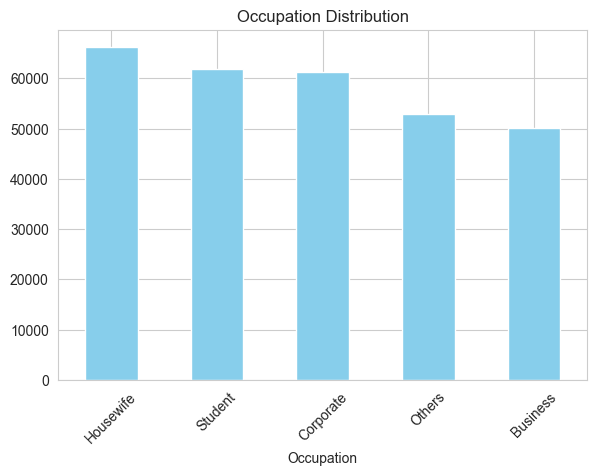

In [11]:
# Occupation distribution
sns.set_style('whitegrid')
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
df['Occupation'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Occupation Distribution')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'United Kingdom'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'Netherlands'),
  Text(5, 0, 'Ireland'),
  Text(6, 0, 'Germany'),
  Text(7, 0, 'Sweden'),
  Text(8, 0, 'India'),
  Text(9, 0, 'France')])

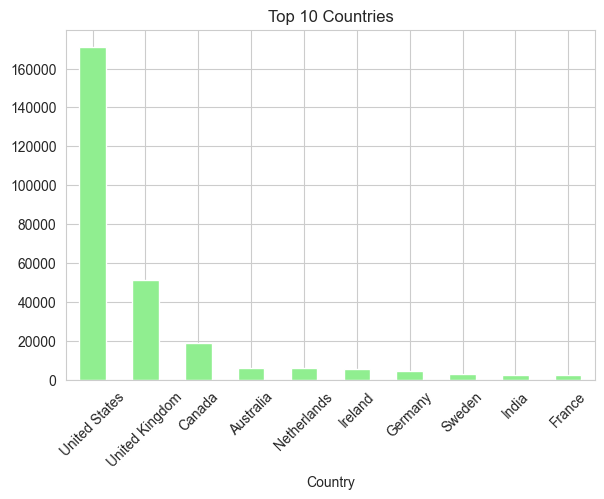

In [12]:
# Country distribution (top 10)
sns.set_style('whitegrid')
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 2)
df['Country'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Countries')
plt.xticks(rotation=45)

Text(0, 0.5, '')

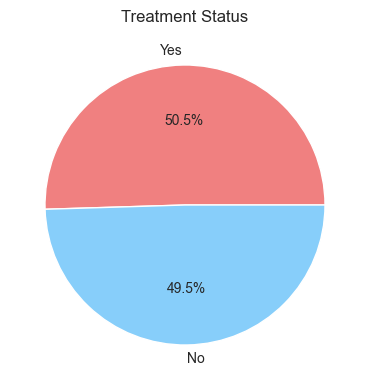

In [13]:
# Treatment status
sns.set_style('whitegrid')
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)

df['treatment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Treatment Status')
plt.ylabel('')

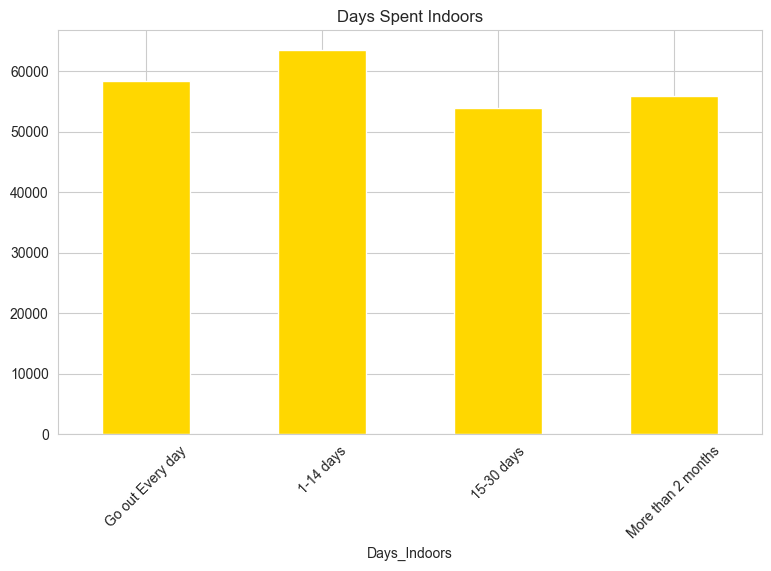

In [14]:
# Days spent indoors
sns.set_style('whitegrid')
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 4)
df['Days_Indoors'].value_counts().sort_index().plot(kind='bar', color='gold')
plt.title('Days Spent Indoors')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

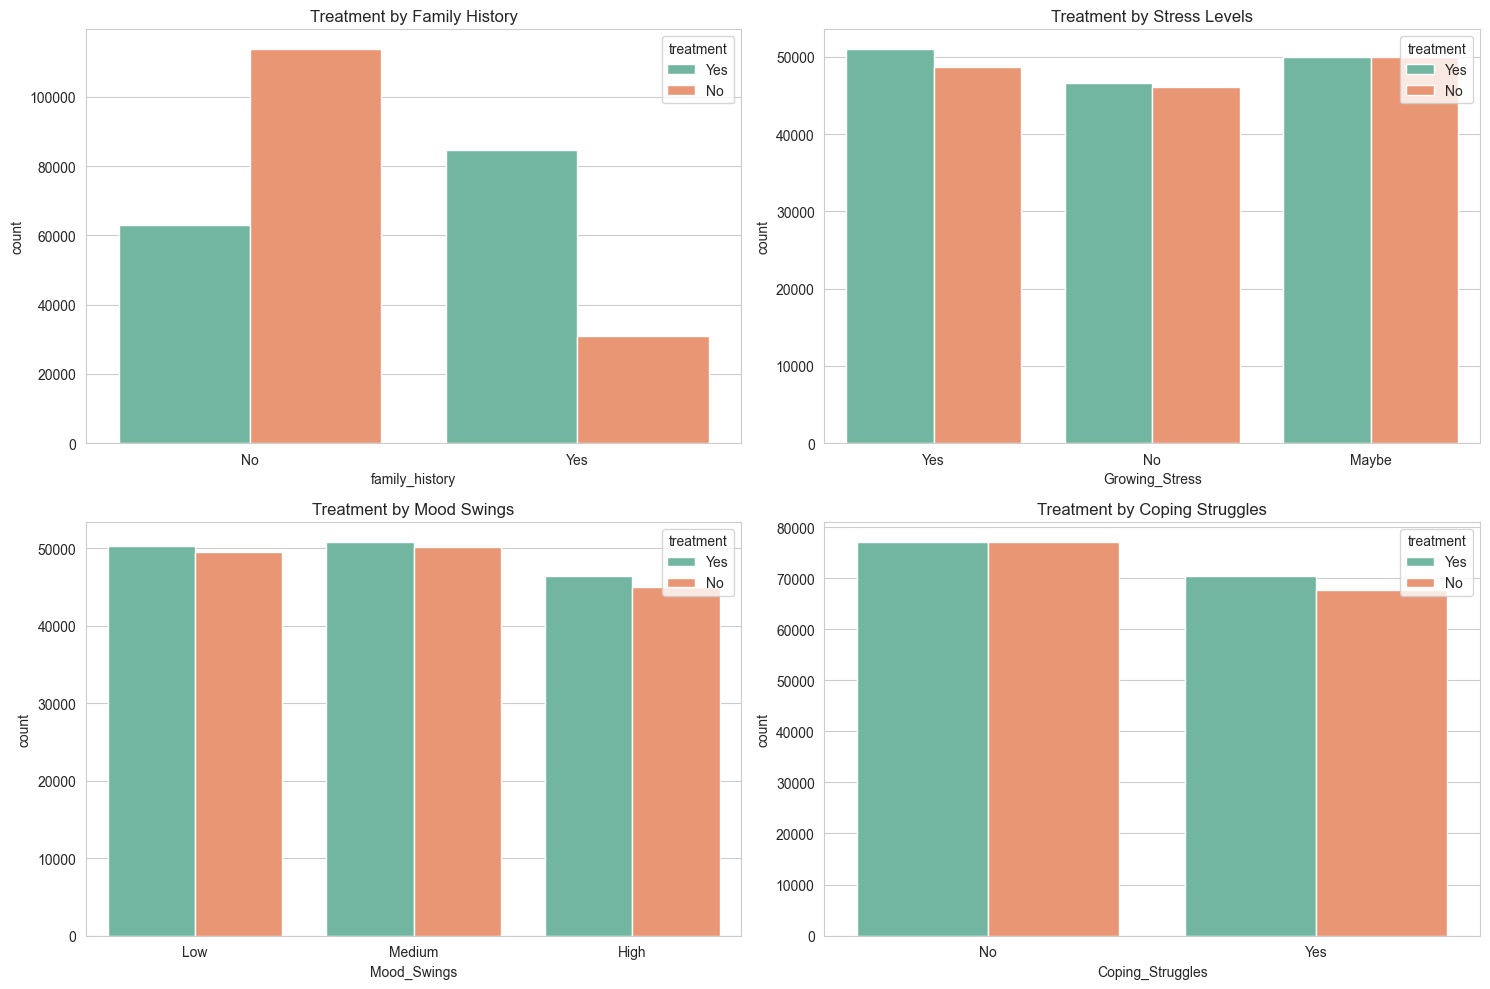

In [15]:
plt.figure(figsize=(15, 10))

# Family history vs treatment
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='family_history', hue='treatment', palette='Set2')
plt.title('Treatment by Family History')

# Growing stress levels
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Growing_Stress', hue='treatment', palette='Set2')
plt.title('Treatment by Stress Levels')

# Mood swings
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Mood_Swings', order=['Low', 'Medium', 'High'], hue='treatment', palette='Set2')
plt.title('Treatment by Mood Swings')

# Coping struggles
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Coping_Struggles', hue='treatment', palette='Set2')
plt.title('Treatment by Coping Struggles')

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

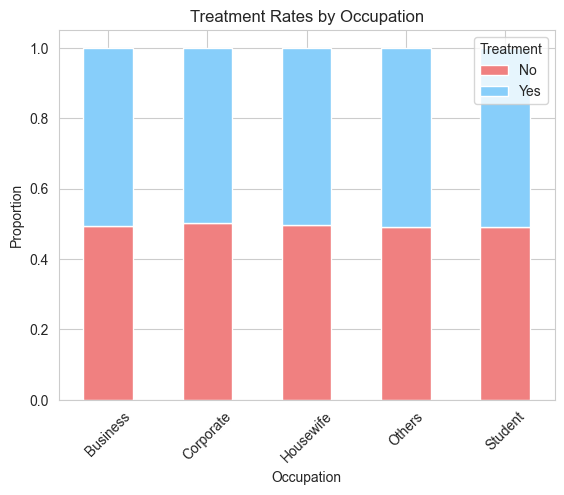

In [16]:
# Treatment rates by occupation
plt.figure(figsize=(12, 6))
treatment_by_occupation = df.groupby('Occupation')['treatment'].value_counts(normalize=True).unstack()
treatment_by_occupation.plot(kind='bar', stacked=True, color=['lightcoral', 'lightskyblue'])
plt.title('Treatment Rates by Occupation')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Treatment')
plt.show()

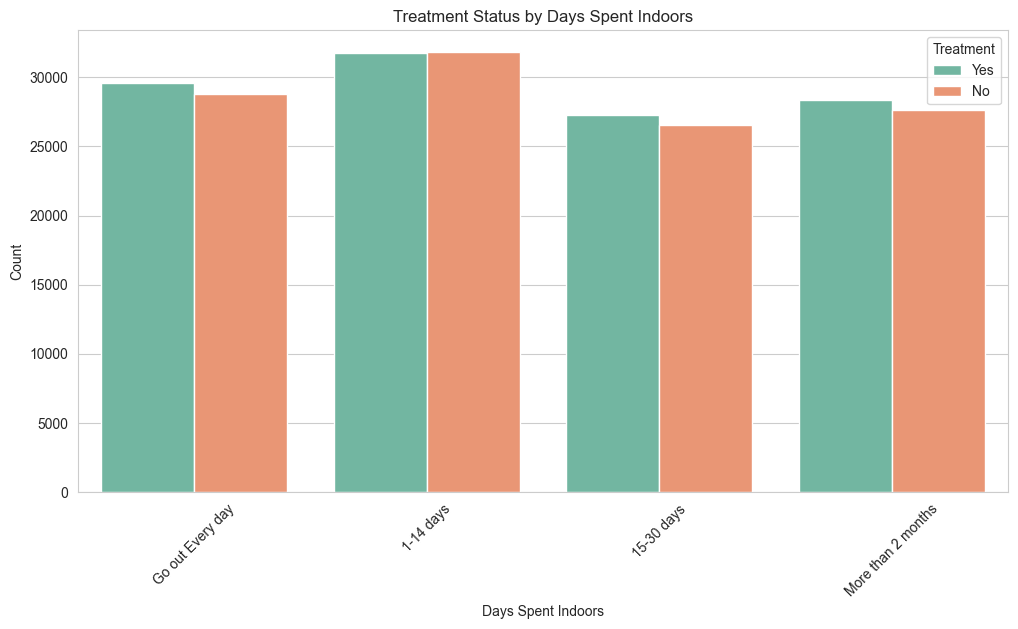

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Days_Indoors', hue='treatment', palette='Set2', order=['Go out Every day', '1-14 days', '15-30 days', 'More than 2 months'])
plt.title('Treatment Status by Days Spent Indoors')
plt.xlabel('Days Spent Indoors')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Treatment')
plt.show()

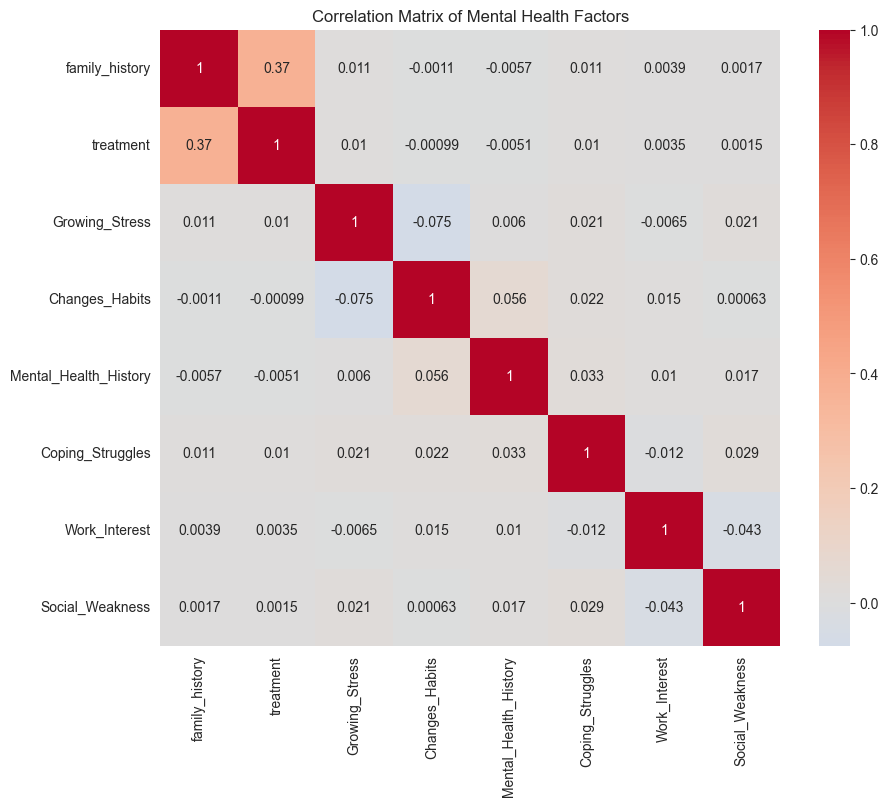

In [19]:
# Convert categorical variables to numerical for correlation analysis
from sklearn.preprocessing import LabelEncoder

# Select columns for correlation analysis
corr_cols = ['family_history', 'treatment', 'Growing_Stress', 'Changes_Habits', 
             'Mental_Health_History', 'Coping_Struggles', 'Work_Interest', 
             'Social_Weakness']

# Encode categorical variables
le = LabelEncoder()
df_encoded = df[corr_cols].apply(le.fit_transform)

# Calculate correlation matrix
corr_matrix = df_encoded.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Mental Health Factors')
plt.show()

/var/folders/yt/qwk2nvv13b3dxlsxs1l7hhd80000gn/T/ipykernel_4459/2346706332.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  treatment_predictors = df.groupby(['family_history', 'Growing_Stress', 'Days_Indoors'])['treatment'].value_counts(normalize=True).unstack().reset_index()
/Users/abhigyansadhanidar/exam/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/abhigyansadhanidar/exam/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

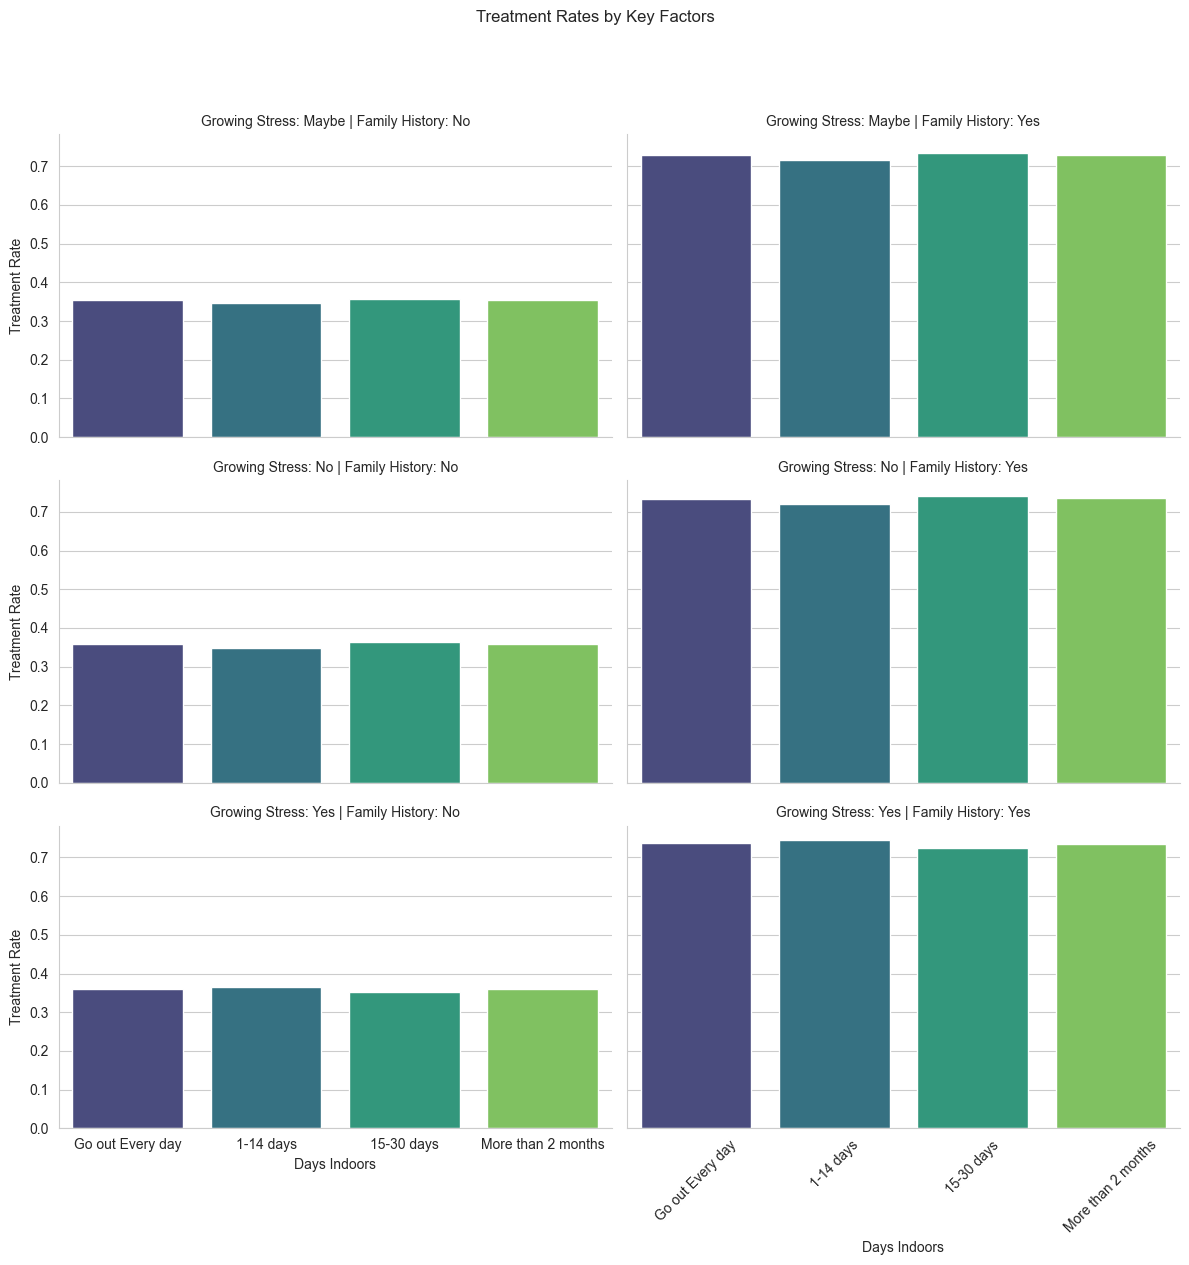

In [20]:
# Prepare data for visualization
treatment_predictors = df.groupby(['family_history', 'Growing_Stress', 'Days_Indoors'])['treatment'].value_counts(normalize=True).unstack().reset_index()

# Create facet grid
g = sns.FacetGrid(treatment_predictors, col='family_history', row='Growing_Stress', height=4, aspect=1.5)
g.map(sns.barplot, 'Days_Indoors', 'Yes', order=['Go out Every day', '1-14 days', '15-30 days', 'More than 2 months'], palette='viridis')

# Add titles and adjust layout
g.set_axis_labels('Days Indoors', 'Treatment Rate')
g.set_titles(col_template="Family History: {col_name}", row_template="Growing Stress: {row_name}")
g.fig.suptitle('Treatment Rates by Key Factors', y=1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/yt/qwk2nvv13b3dxlsxs1l7hhd80000gn/T/ipykernel_4459/6170791.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  treatment_predictors = df.groupby(['family_history', 'Growing_Stress', 'Days_Indoors'])['treatment'].value_counts(normalize=True).unstack().reset_index()
/Users/abhigyansadhanidar/exam/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/abhigyansadhanidar/exam/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `

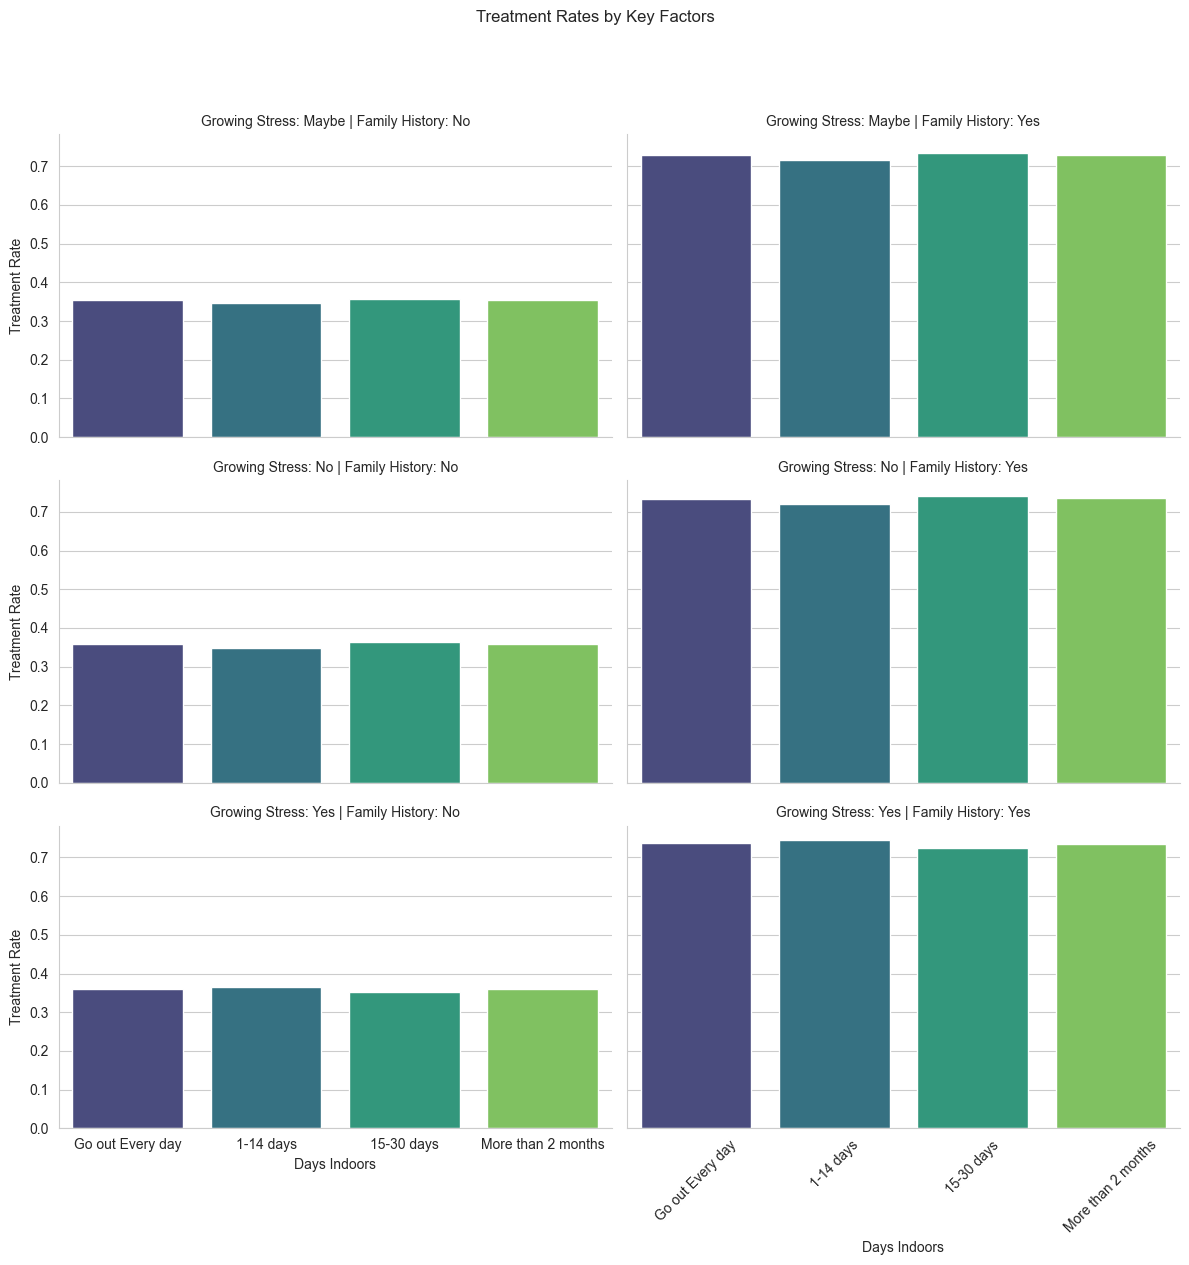

In [21]:
# Prepare data for visualization
treatment_predictors = df.groupby(['family_history', 'Growing_Stress', 'Days_Indoors'])['treatment'].value_counts(normalize=True).unstack().reset_index()

# Create facet grid
g = sns.FacetGrid(treatment_predictors, col='family_history', row='Growing_Stress', height=4, aspect=1.5)
g.map(sns.barplot, 'Days_Indoors', 'Yes', order=['Go out Every day', '1-14 days', '15-30 days', 'More than 2 months'], palette='viridis')

# Add titles and adjust layout
g.set_axis_labels('Days Indoors', 'Treatment Rate')
g.set_titles(col_template="Family History: {col_name}", row_template="Growing Stress: {row_name}")
g.fig.suptitle('Treatment Rates by Key Factors', y=1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# Chi-square test for family history and treatment
contingency_table = pd.crosstab(df['family_history'], df['treatment'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test for family history and treatment: p-value = {p:.4f}")

# Chi-square test for growing stress and treatment
contingency_table = pd.crosstab(df['Growing_Stress'], df['treatment'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test for growing stress and treatment: p-value = {p:.4f}")